# 1. Problem Framing

Poor mental health days is the target variable.

# 2. Data Exploration

First the relevant libraries must be imported.

In [1]:
import pandas as pd
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',999)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import itertools
import warnings
warnings.filterwarnings("ignore")

The data is then read from a .csv file into a pandas dataframe.

In [2]:
df_original = pd.read_csv('analytic_data2019.csv')
df_original.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [3]:
print('Number of rows: ', len(df_original))
print('Number of columns: ', len(df_original.columns))

Number of rows:  3195
Number of columns:  534


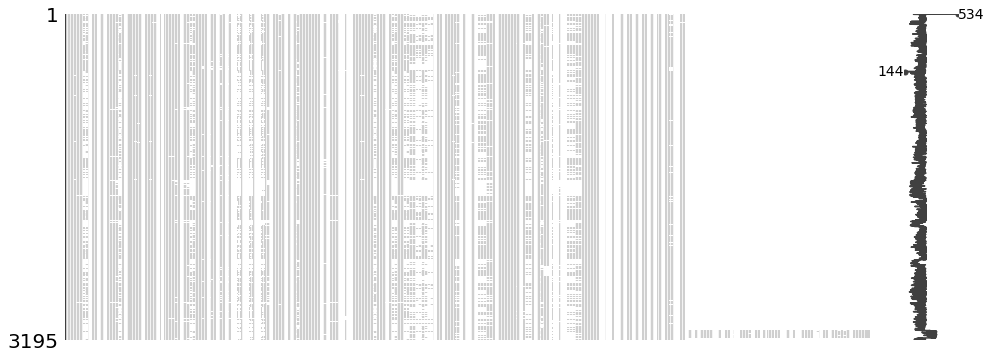

In [4]:
missingno.matrix(df_original, figsize=(16,6))
plt.show()

In [5]:
df_original['Poor mental health days raw value'].isnull().sum()

1

# 3. Data Wrangling

In [6]:
df_cleaning = df_original.copy()

In [7]:
df_cleaning.drop(df_cleaning.index[[0]], inplace=True)
df_cleaning.head(2)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [8]:
df_cleaning['County Ranked (Yes=1/No=0)'].fillna(0, inplace=True)

In [9]:
df_cleaning = df_cleaning[df_cleaning['County Ranked (Yes=1/No=0)'] != 0]

In [10]:
print('Number of rows: ', len(df_cleaning))

Number of rows:  3095


In [11]:
df_cleaning.drop(columns=['State FIPS Code','County FIPS Code',
                          '5-digit FIPS Code','Release Year','County Ranked (Yes=1/No=0)'], inplace=True)
df_cleaning.head(2)

,State Abbreviation,Name,Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High school graduation CI low,High school graduation CI high,Some college raw value,Some college

In [12]:
columns = df_cleaning.columns
columns_included = list(filter(lambda column: column != 'State Abbreviation' and column != 'Name', columns))

for column in columns_included:
    df_cleaning[column] = df_cleaning[column].astype(float)

In [13]:
search_terms = ['White','white','Black','black','Hispanic','hispanic','CI','numerator','denominator']

columns_to_drop = []

for term in search_terms:
    
    df_cleaning_2 = df_cleaning.filter(regex=term)
    columns_to_drop.append(list(df_cleaning_2.columns))

columns_to_drop = list(itertools.chain(*columns_to_drop))
print('Number of columns to drop: ', len(columns_to_drop))

Number of columns to drop:  450


In [14]:
df_cleaning.drop(columns=columns_to_drop, inplace=True)

In [15]:
print('Number of columns in dataframe: ', len(df_cleaning.columns))

Number of columns in dataframe:  109


In [16]:
df_cleaning['Population growth raw value'].isnull().sum()

3023

In [17]:
df_cleaning = df_cleaning.loc[:, df_cleaning.isnull().mean() < .1]
print('Number of columns: ', len(df_cleaning.columns))

Number of columns:  68


In [18]:
df_cleaning.reset_index(drop=True, inplace=True)

In [19]:
df_cleaning.head(5)

,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental health providers raw value,Ratio of population to mental health providers.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Children eligible for free or reduced price lunch raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,AL,Autauga County,8824.057123,0.184111,4.200578,4.306739,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,2409.391304,0.000324,3083.555556,0.000162,6167.111111,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,11.7,0.0,0.149546,0.132052,0.024516,0.006374,0.859651,0.383,76.330589,438.7,0.128244,0.126384,0.142,0.134,0.119911,0.359054,0.109611,0.024762,0.000306,3264.941176,58343.0,0.479317,0.732877,0.126452,55504.0,0.239370,0.151196,0.004756,0.012792,0.001045,0.008285,0.513422,0.420022
1,AL,Baldwin County,7224.632160,0.180605,4.098748,4.249649,0.083387,0.167955,0.310,8.0,0.238,0.719710,0.167150,0.318750,338.8,29.594009,0.106993,0.000729,1372.125000,0.000499,2005.924528,0.000912,1096.020619,3833.0,0.45,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,10.3,1.0,0.138317,0.125693,0.010728,0.006072,0.847194,0.405,78.599498,348.4,0.126220,0.128226,0.113,0.123,0.054244,0.333059,0.135703,0.032380,0.000522,1915.567568,56607.0,0.450791,0.728593,0.127959,212628.0,0.218485,0.199470,0.007760,0.011565,0.000687,0.004545,0.514528,0.422791
2,AL,Barbour County,9586.165037,0.257734,5.067438,4.634994,0.109526,0.215409,0.443,5.6,0.282,0.536257,0.126987,0.296296,557.9,45.092838,0.125132,0.000385,2596.500000,0.000356,2807.777778,0.000079,12635.000000,4736.0,0.46,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,8.472944,414.277861,72.900134,11.5,0.0,0.154555,0.136743,0.020065,0.008134,0.834044,0.338,75.779457,469.8,0.162162,0.146323,0.180,0.232,0.107397,0.385632,0.165422,0.029014,0.000237,4211.666667,32490.0,0.737698,0.625068,0.135868,25270.0,0.207638,0.188247,0.006529,0.004630,0.001860,0.011

In [20]:
df_cleaning.isnull().sum().sum()

1944

In [21]:
county_names = df_cleaning["Name"]
df_cleaning.drop(columns=["Name"], inplace=True)

In [22]:
df_cleaning.head(2)

,State Abbreviation,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental health providers raw value,Ratio of population to mental health providers.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Children eligible for free or reduced price lunch raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,AL,8824.057123,0.184111,4.200578,4.306739,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.16878,0.288136,341.2,26.524208,0.085010,0.000415,2409.391304,0.000324,3083.555556,0.000162,6167.111111,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,11.7,0.0,0.149546,0.132052,0.024516,0.006374,0.859651,0.383,76.330589,438.7,0.128244,0.126384,0.142,0.134,0.119911,0.359054,0.109611,0.024762,0.000306,3264.941176,58343.0,0.479317,0.732877,0.126452,55504.0,0.239370,0.151196,0.004756,0.012792,0.001045,0.008285,0.513422,0.420022
1,AL,7224.632160,0.180605,4.098748,4.249649,0.083387,0.167955,0.310,8.0,0.238,0.719710,0.16715,0.318750,338.8,29.594009,0.106993,0.000729,1372.125000,0.000499,2005.924528,0.000912,1096.020619,3833.0,0.45,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,10.3,1.0,0.138317,0.125693,0.010728,0.006072,0.847194,0.405,78.599498,348.4,0.126220,0.128226,0.113,0.123,0.054244,0.333059,0.135703,0.032380,0.000522,1915.567568,56607.0,0.450791,0.728593,0.127959,212628.0,0.218485,0.199470,0.007760,0.011565,0.000687,0.004545,0.514528,0.422791


In [23]:
df_cleaning.iloc[:,1:] = df_cleaning.groupby("State Abbreviation").transform(lambda x: x.fillna(x.median()))

In [24]:
df_cleaning.isnull().sum().sum()

152

In [25]:
columns = df_cleaning.columns
columns_with_nulls = []

for column in columns:
    if df_cleaning[column].isnull().sum() > 0:
        columns_with_nulls.append(column)

columns_with_nulls

['Air pollution - particulate matter raw value',
 'Drinking water violations raw value',
 'Children eligible for free or reduced price lunch raw value']

In [26]:
df_cleaning.drop(columns=columns_with_nulls, inplace=True)

In [27]:
df_cleaning.insert(1, "County Name", county_names)

In [28]:
poor_mental_health = df_cleaning['Poor mental health days raw value']
df_cleaning.drop(columns=['Poor mental health days raw value'], inplace=True)
df_cleaning.insert(2, "Poor mental health days", poor_mental_health)

In [29]:
df_cleaning.head()

,State Abbreviation,County Name,Poor mental health days,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental health providers raw value,Ratio of population to mental health providers.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,AL,Autauga County,4.306739,8824.057123,0.184111,4.200578,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,2409.391304,0.000324,3083.555556,0.000162,6167.111111,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,0.149546,0.132052,0.024516,0.006374,0.859651,0.383,76.330589,438.7,0.128244,0.126384,0.142,0.134,0.119911,0.359054,0.109611,0.024762,0.000306,3264.941176,58343.0,0.732877,0.126452,55504.0,0.239370,0.151196,0.004756,0.012792,0.001045,0.008285,0.513422,0.420022
1,AL,Baldwin County,4.249649,7224.632160,0.180605,4.098748,0.083387,0.167955,0.310,8.0,0.238,0.719710,0.167150,0.318750,338.8,29.594009,0.106993,0.000729,1372.125000,0.000499,2005.924528,0.000912,1096.020619,3833.0,0.45,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,0.138317,0.125693,0.010728,0.006072,0.847194,0.405,78.599498,348.4,0.126220,0.128226,0.113,0.123,0.054244,0.333059,0.135703,0.032380,0.000522,1915.567568,56607.0,0.728593,0.127959,212628.0,0.218485,0.199470,0.007760,0.011565,0.000687,0.004545,0.514528,0.422791
2,AL,Barbour County,4.634994,9586.165037,0.257734,5.067438,0.109526,0.215409,0.443,5.6,0.282,0.536257,0.126987,0.296296,557.9,45.092838,0.125132,0.000385,2596.500000,0.000356,2807.777778,0.000079,12635.000000,4736.0,0.46,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,8.472944,414.277861,72.900134,0.154555,0.136743,0.020065,0.008134,0.834044,0.338,75.779457,469.8,0.162162,0.146323,0.180,0.232,0.107397,0.385632,0.165422,0.029014,0.000237,4211.666667,32490.0,0.625068,0.135868,25270.0,0.207638,0.188247,0.006529,0.004630,0.001860,0.011993,0.472299,0.677896
3,AL,Bibb County,4.315710,11783.543675,0.199969,4.363377,0.111050,0.199164,0.378,7.6,0.349,0.162514,0.159252,0.272727,302.1,45.454545,0.096801,0.000574,1741.769231,0.000265,377

In [30]:
df_cleaning_1 = df_cleaning.copy()

In [31]:
df_cleaning_1.drop(columns=["State Abbreviation","County Name"], inplace=True)

In [32]:
corr_mat_1 = df_cleaning_1.corr()

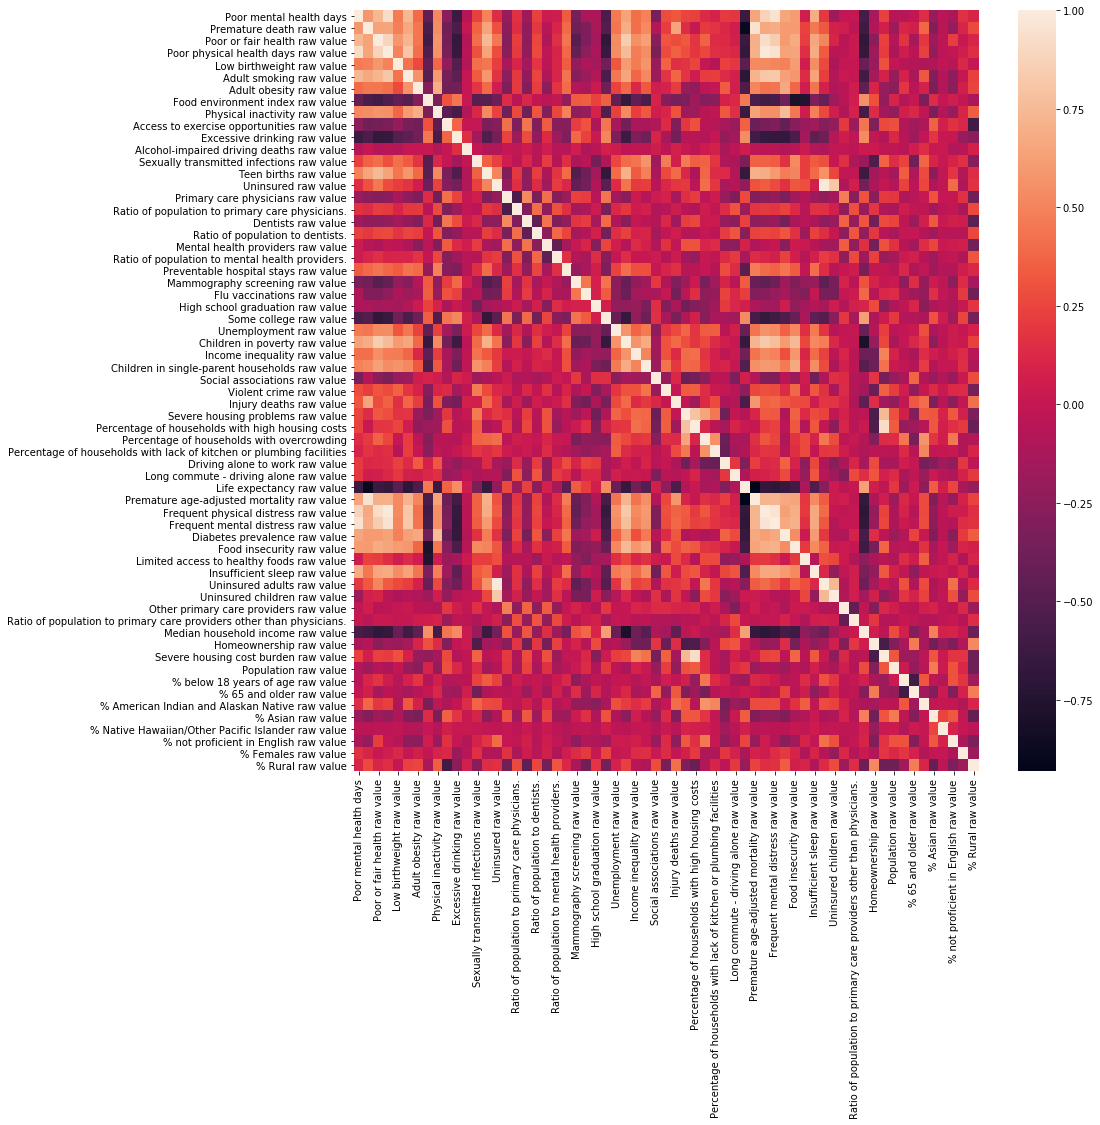

In [33]:
plt.figure(figsize=(14,14))

ax = sns.heatmap(corr_mat_1)

From the correlation matrix it is clear that life expectancy is strongly negatively correlated with many of the other values. This colinearity should be avoided. It is also likely that the dependant variable of this study, poor mental health, may be a causal factor in shorter life expectancy, not the other way around. For these reasons, this column is dropped from the study. Frequent mental distress and poor mental health days are proxies of each other and therefore the frequent mental distress variable was also dropped.

In [34]:
df_cleaning_1.drop(columns=["Life expectancy raw value",
                            "Frequent mental distress raw value",
                            "Frequent physical distress raw value",
                            "Poor or fair health raw value"],
                            inplace=True)

In [35]:
corr_mat_2 = df_cleaning_1.corr()

In [36]:
top_corr = corr_mat_2['Poor mental health days'].abs(
                        ).sort_values(ascending=False)[1:6]
top_corr

Poor physical health days raw value           0.918735
Adult smoking raw value                       0.739944
Insufficient sleep raw value                  0.684812
Diabetes prevalence raw value                 0.655727
Premature age-adjusted mortality raw value    0.648104
Name: Poor mental health days, dtype: float64

In [37]:
df_top_corr = pd.DataFrame(top_corr)
df_top_corr_features = df_top_corr.index
features = list(df_top_corr_features)

In [38]:
df_modelling = df_cleaning_1[features]
df_modelling.insert(0, "Poor mental health days", poor_mental_health)
df_modelling.insert(0, "State Abbreviation", df_cleaning['State Abbreviation'])
df_modelling.insert(0, "County Name", df_cleaning['County Name'])
df_modelling.head()

,County Name,State Abbreviation,Poor mental health days,Poor physical health days raw value,Adult smoking raw value,Insufficient sleep raw value,Diabetes prevalence raw value,Premature age-adjusted mortality raw value
0,Autauga County,AL,4.306739,4.200578,0.191247,0.359054,0.142,438.7
1,Baldwin County,AL,4.249649,4.098748,0.167955,0.333059,0.113,348.4
2,Barbour County,AL,4.634994,5.067438,0.215409,0.385632,0.180,469.8
3,Bibb County,AL,4.315710,4.363377,0.199164,0.381489,0.149,563.7
4,Blount County,AL,4.701599,4.512753,0.196522,0.359450,0.143,501.8


# 4. Modelling

## 4.1. Plotting Highly Correlated Variables

Plotting some of the strongest correlated variables to get an visual understanding of how they are linked

In [39]:
df_modelling_1 = df_modelling.copy()

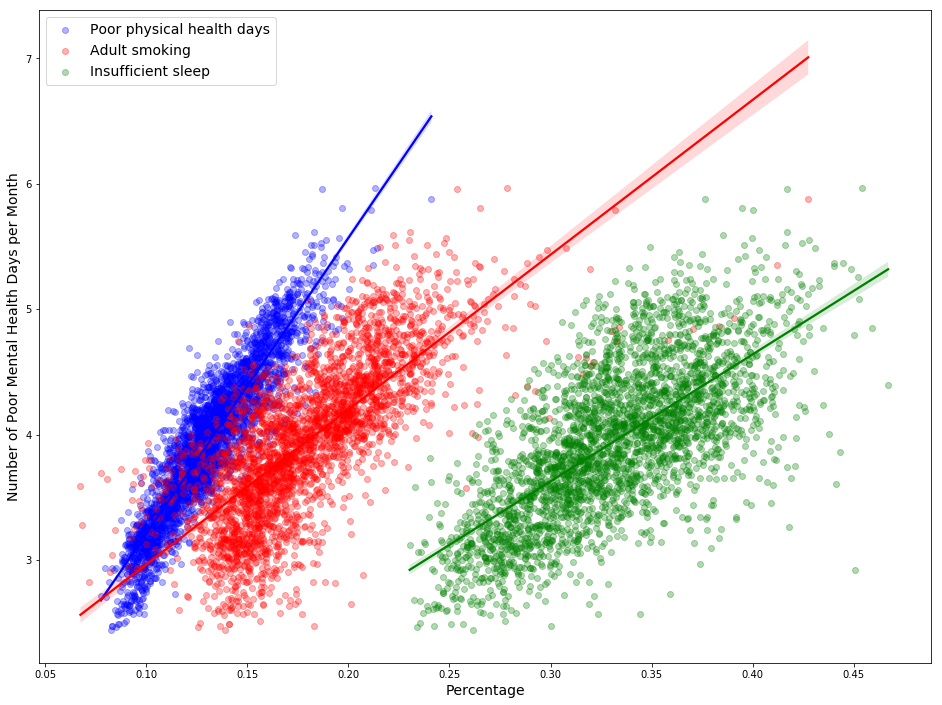

In [40]:
fig, ax = plt.subplots(figsize=(16,12))

sns.regplot(df_modelling_1['Poor physical health days raw value']/30, 
            y='Poor mental health days',
            data=df_modelling_1,
            color='blue',
            scatter_kws={'alpha':0.3},
            label='Poor physical health days',
            ax=ax)
sns.regplot(x='Adult smoking raw value', 
            y='Poor mental health days',
            data=df_modelling_1,
            color='red',
            scatter_kws={'alpha':0.3},
            label='Adult smoking',
            ax=ax)
sns.regplot(x='Insufficient sleep raw value', 
            y='Poor mental health days',
            data=df_modelling_1,
            color='green',
            scatter_kws={'alpha':0.3},
            label='Insufficient sleep',
            ax=ax)
plt.legend(fontsize=14)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Number of Poor Mental Health Days per Month', fontsize=14)
plt.show()

## 4.2. Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df_modelling_1.drop(columns=['State Abbreviation','County Name'], inplace=True)

In [43]:
y = df_modelling_1['Poor mental health days']
X = df_modelling_1.drop(columns=['Poor mental health days'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=1000)

## 4.3. Model Creation

### 4.3.1 Linear Regression (Baseline Model)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [52]:
kf = KFold(n_splits=5)

In [53]:
base_train_r_squared_list = []
base_test_r_squared_list = []

baseline = LinearRegression()
baseline.fit(X_train, y_train)

model_scores = cross_validate(baseline,
                                 X_train,
                                 y_train,
                                 scoring=('r2', 'neg_mean_squared_error'),
                                 cv=kf,
                                 return_train_score=True)

base_train_r_squared_list.append(model_scores['train_r2'].mean())
base_test_r_squared_list.append(model_scores['test_r2'].mean())

df_base = pd.DataFrame()
df_base['Train r^2'] = base_train_r_squared_list
df_base['Test r^2'] = base_test_r_squared_list
df_base['Difference'] = df_base['Train r^2'] - df_base['Test r^2']
df_base

,Train r^2,Test r^2,Difference
0,0.856101,0.85408,0.00202


### 4.3.2. Polynomial Regression

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
degree_list = []
poly_train_r_squared_list = []
poly_test_r_squared_list = []

for degree in np.arange(1,4):
    
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    poly_reg = LinearRegression().fit(X_train_poly, y_train)
    y_pred = poly_reg.predict(X_train_poly)
    r_squared = poly_reg.score(X_train_poly, y_train)
    
    model_score = cross_validate(poly_reg,
                                 X_train_poly,
                                 y_train,
                                 scoring=('r2', 'neg_mean_squared_error'),
                                 cv=kf,
                                 return_train_score=True)
    
    degree_list.append(degree)
    poly_train_r_squared_list.append(model_score['train_r2'].mean())
    poly_test_r_squared_list.append(model_score['test_r2'].mean())

df_poly = pd.DataFrame()
df_poly['Polynomial Degree'] = degree_list
df_poly['Train r^2'] = poly_train_r_squared_list
df_poly['Test r^2'] = poly_test_r_squared_list
df_poly['Difference'] = df_poly['Train r^2'] - df_poly['Test r^2']
df_poly

,Polynomial Degree,Train r^2,Test r^2,Difference
0,1,0.856101,0.854080,0.002020
1,2,0.872166,0.866537,0.005628
2,3,0.884251,0.867923,0.016328


### 4.3.3 Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [57]:
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)

In [58]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train_poly)

In [59]:
alpha_list = []
lasso_train_r_squared_list = []
lasso_test_r_squared_list = []

for alpha in np.linspace(0.001, 0.01, 10):
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_s, y_train)
    model_scores = cross_validate(lasso,
                                  X_train_s,
                                  y_train,
                                  scoring=('r2','neg_mean_squared_error'),
                                  cv=kf,
                                  return_train_score=True)
    
    alpha_list.append(alpha)
    lasso_train_r_squared_list.append(model_scores['train_r2'].mean())
    lasso_test_r_squared_list.append(model_scores['test_r2'].mean())

df_lasso = pd.DataFrame()
df_lasso['Alpha'] = alpha_list
df_lasso['Train r^2'] = lasso_train_r_squared_list
df_lasso['Test r^2'] = lasso_test_r_squared_list
df_lasso['Difference'] = df_lasso['Train r^2'] - df_lasso['Test r^2']
df_lasso

,Alpha,Train r^2,Test r^2,Difference
0,0.001,0.865627,0.861304,0.004322
1,0.002,0.863010,0.859939,0.003070
2,0.003,0.860276,0.857522,0.002754
3,0.004,0.857016,0.854844,0.002172
4,0.005,0.856710,0.854527,0.002182
5,0.006,0.856436,0.854206,0.002230
6,0.007,0.856123,0.853845,0.002278
7,0.008,0.855760,0.853428,0.002333
8,0.009,0.855364,0.852970,0.002394
9,0.010,0.855004,0.852658,0.002346


### 4.3.4. Ridge Regression

In [60]:
from sklearn.linear_model import Ridge

In [61]:
alpha_list = []
ridge_train_r_squared_list = []
ridge_test_r_squared_list = []

for alpha in [0.0001,0.001,0.01,1,50,100,1000,10000]:
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_s, y_train)
    model_scores = cross_validate(ridge,
                                  X_train_s,
                                  y_train,
                                  scoring=('r2','neg_mean_squared_error'),
                                  cv=kf,
                                  return_train_score=True)
    
    alpha_list.append(alpha)
    ridge_train_r_squared_list.append(model_scores['train_r2'].mean())
    ridge_test_r_squared_list.append(model_scores['test_r2'].mean())

df_ridge = pd.DataFrame()
df_ridge['Alpha'] = alpha_list
df_ridge['Train r^2'] = ridge_train_r_squared_list
df_ridge['Test r^2'] = ridge_test_r_squared_list
df_ridge['Difference'] = df_ridge['Train r^2'] - df_ridge['Test r^2']
df_ridge

,Alpha,Train r^2,Test r^2,Difference
0,0.0001,0.884248,0.868386,0.015862
1,0.0010,0.884054,0.870657,0.013397
2,0.0100,0.882135,0.872234,0.009900
3,1.0000,0.873873,0.868160,0.005714
4,50.0000,0.859082,0.855762,0.003320
5,100.0000,0.853864,0.851032,0.002832
6,1000.0000,0.823321,0.820818,0.002503
7,10000.0000,0.731662,0.728896,0.002766


### 4.3.5. ElasticNet Regression

In [62]:
from sklearn.linear_model import ElasticNet

In [63]:
alpha_list = []
elastic_train_r_squared_list = []
elastic_test_r_squared_list = []

for alpha in np.linspace(0.001, 0.01, 10):
    
    elastic = ElasticNet(alpha=alpha)
    elastic.fit(X_train_s, y_train)
    model_scores = cross_validate(elastic,
                                  X_train_s,
                                  y_train,
                                  scoring=('r2', 'neg_mean_squared_error'),
                                  cv=kf,
                                  return_train_score=True)
    
    alpha_list.append(alpha)
    elastic_train_r_squared_list.append(model_scores['train_r2'].mean())
    elastic_test_r_squared_list.append(model_scores['test_r2'].mean())
    
df_elastic = pd.DataFrame()
df_elastic['Alpha'] = alpha_list
df_elastic['Train r^2'] = elastic_train_r_squared_list
df_elastic['Test r^2'] = elastic_test_r_squared_list
df_elastic['Difference'] = df_elastic['Train r^2'] - df_elastic['Test r^2']
df_elastic


,Alpha,Train r^2,Test r^2,Difference
0,0.001,0.867787,0.861993,0.005794
1,0.002,0.865136,0.861314,0.003822
2,0.003,0.863459,0.860493,0.002965
3,0.004,0.862262,0.859452,0.002809
4,0.005,0.860815,0.858200,0.002615
5,0.006,0.859052,0.856574,0.002477
6,0.007,0.857503,0.855193,0.002309
7,0.008,0.856691,0.854548,0.002143
8,0.009,0.856471,0.854351,0.002120
9,0.010,0.856289,0.854175,0.002114


In [64]:
models = ['Linear (baseline)',
            'Polynomial (degree = 4)',
            'Lasso (alpha = 0.001)',
            'Ridge (alpha = 0.01)',
            'ElasticNet (alpha = 0.001)']

In [68]:
df_models = df_base
df_models.loc[df_poly.index[1]] = df_poly.iloc[2]
df_models.loc[df_lasso.index[2]] = df_lasso.iloc[0]
df_models.loc[df_ridge.index[3]] = df_ridge.iloc[2]
df_models.loc[df_elastic.index[4]] = df_elastic.iloc[0]
df_models.insert(0, "Model", models)
df_models

,Model,Train r^2,Test r^2,Difference
0,Linear (baseline),0.856101,0.854080,0.002020
1,Polynomial (degree = 4),0.884251,0.867923,0.016328
2,Lasso (alpha = 0.001),0.865627,0.861304,0.004322
3,Ridge (alpha = 0.01),0.882135,0.872234,0.009900
4,ElasticNet (alpha = 0.001),0.867787,0.861993,0.005794


<Figure size 864x864 with 0 Axes>

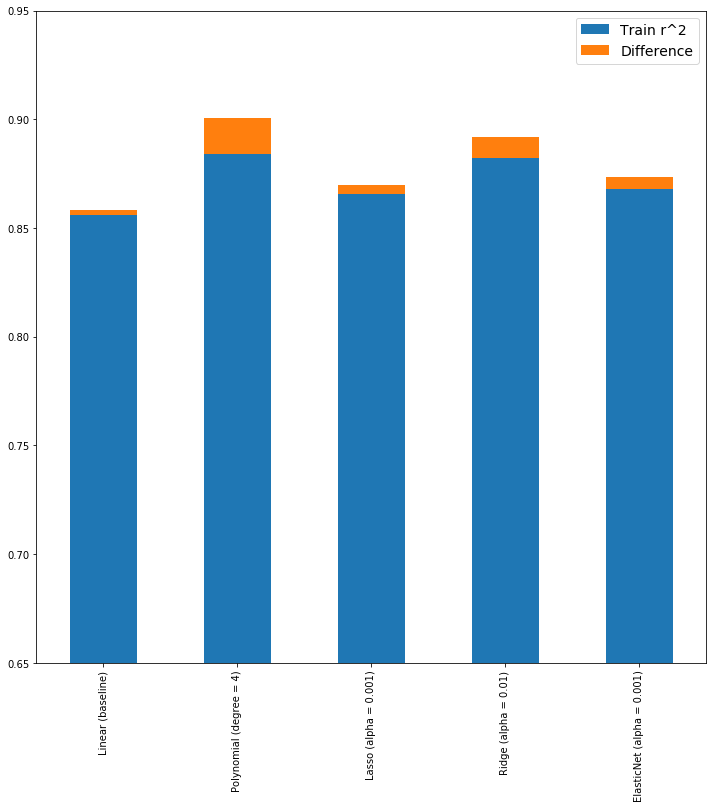

In [96]:
x = df_models[['Train r^2','Difference']]
y = df_models[['Model']]

plt.figure(figsize=(12,12))
df_models[['Train r^2','Difference']].plot(kind='bar',
                                           stacked=True,
                                           figsize=(12,12))
plt.xticks([0,1,2,3,4], df_models['Model'])
plt.ylim(bottom=0.65, top=0.95)
plt.legend(fontsize=14)
plt.xlabel('')
plt.show()

## 4.4. Testing

# 5. Evaluation